In [ ]:
%matplotlib notebook

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import math

In [2]:
#import cleanup data
movies = pd.read_csv("Resources/US_movies_cleanup.csv", encoding ="ISO-8859-1")
movies.count()
movies

,Unnamed: 0,Title,Runtime (mins),Year,Release Date,IMDb Rating,Num Votes,Rotten Tomatoes Rating,Metascore,Box Office
0,0,Pulp Fiction,154 min,1994,14 Oct 1994,8.9,"1,645,131",92%,94.0,NaN
1,1,The Amazing Spider-Man 2,142 min,2014,02 May 2014,6.6,"388,759",52%,53.0,"$183,277,573"
2,2,The Shawshank Redemption,142 min,1994,14 Oct 1994,9.3,"2,099,597",91%,80.0,NaN
3,3,Star Wars: Episode IV - A New Hope,121 min,1977,25 May 1977,8.6,"1,123,397",93%,90.0,NaN
4,4,Back to the Future,116 min,1985,03 Jul 1985,8.5,"938,445",96%,87.0,"$2,925,880"
5,5,The Breakfast Club,97 min,1985,15 Feb 1985,7.9,"319,029",88%,62.0,NaN
6,6,The Goonies,114 min,1985,07 Jun 1985,7.8,"217,534",71%,62.0,NaN
7,7,The Silence of the Lambs,118 min,1991,14 Feb 1991,8.6,"1,137,744",96%,85.0,NaN
8,8,Jurassic Park,127 min,1993,11 Jun 1993,8.1,"784,720",91%,68.0,"$45,299,680"
9,9,The Lion King,88 min,1994,24 Jun 1994,8.5,"838,220",93%,83.0,"$94,240,635"


In [3]:
#3 ratings distribution
# Create the bins in which Data will be held and draw bar chart to show distribution
# bins = [0,10,20,30,40,50,60,70,80,90,100]

# a_d = movies.iloc[:, -5]*10
# b_d=movies.iloc[:, -3]
# Nb_d = b_d.str.replace("%","").astype(float)
# c_d = movies.iloc[:, -2]
# fig1 =plt.hist(a_d,bins, density=True, alpha=0.7, label="IMDb")
# figure2=plt.hist(Nb_d,bins, density=True, alpha=0.7, label="Rotten Tomato")
# figure3=plt.hist(c_d,bins,density=True, alpha=0.7, label="Metascore")
# plt.show()

In [4]:
# drop data without box office number
BOdrop = movies.dropna()
BOdrop.count()

Unnamed: 0                2819
Title                     2819
Runtime (mins)            2819
Year                      2819
Release Date              2819
IMDb Rating               2819
Num Votes                 2819
Rotten Tomatoes Rating    2819
Metascore                 2819
Box Office                2819
dtype: int64

In [5]:
## Preparation of t-tests

IMDB_rating= BOdrop.iloc[:, -5]*10
IMDB_rating_N= IMDB_rating.tolist()

Rott_rating = BOdrop.iloc[:, -3]
New_Rott = Rott_rating.str.replace("%","").astype(float)
Rott_rating_N = Rott_rating.tolist()

Meta_rating = BOdrop.iloc[:, -2]
Meta_rating_N = Meta_rating.tolist()

#z-test ? Anova -test

In [6]:
##IMDB vs.Rotten Tomato t-test

(t_stat, p) =stats.ttest_ind(IMDB_rating, New_Rott,equal_var=False)
print((t_stat, p))

# Report the data
print("The mean rating of IMDB is {}.".format(IMDB_rating.mean()))
print("The mean rating of Rotten Tomato is {}.".format(New_Rott.mean()))

print("p is {}.".format(p))
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

(22.675991611982468, 1.7870990919528473e-106)
The mean rating of IMDB is 63.799929052855624.
The mean rating of Rotten Tomato is 51.4487406881873.
p is 1.7870990919528473e-106.
The difference in sample means is significant.


In [7]:
##IMDB vs.Metascore t-test

(t_stat1, p1) =stats.ttest_ind(IMDB_rating_N, Meta_rating_N,equal_var=False)
print((t_stat1, p1))

# Report the data
print("The mean rating of IMDB is {}.".format(IMDB_rating.mean()))
print("The mean rating of Rotten Tomato is {}.".format(Meta_rating.mean()))

print("p1 is {}.".format(p1))
if p1 < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

(28.368129092672653, 5.257310678693548e-163)
The mean rating of IMDB is 63.799929052855624.
The mean rating of Rotten Tomato is 53.04824405817666.
p1 is 5.257310678693548e-163.
The difference in sample means is significant.


In [8]:
##Rotten Tomato vs.Metascore t-test
(t_stat2, p2) =stats.ttest_ind(New_Rott,Meta_rating_N,equal_var=False)
print((t_stat2, p2))

# Report the data
print("The mean rating of Metascore is {}.".format(Meta_rating.mean()))
print("The mean rating of Rotten Tomato is {}.".format(New_Rott.mean()))
print("p2 is {}.".format(p2))
if p2 < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

(-2.633429820667516, 0.00847978977597725)
The mean rating of Metascore is 53.04824405817666.
The mean rating of Rotten Tomato is 51.4487406881873.
p2 is 0.00847978977597725.
The difference in sample means is significant.


In [9]:
# Regression analysis: We would like to know the relationship between Rating score and Box office. 
# We use linear regression method to find the relationship.


In [10]:
# Define the data/predictors as the pre-set feature names  

# Put the target (Box office) in another DataFrame
target = pd.DataFrame(BOdrop, columns=["Box Office"])
target.apply(pd.to_numeric, errors='ignore')
type(target)
BOdrop.head()

,Unnamed: 0,Title,Runtime (mins),Year,Release Date,IMDb Rating,Num Votes,Rotten Tomatoes Rating,Metascore,Box Office
1,1,The Amazing Spider-Man 2,142 min,2014,02 May 2014,6.6,"388,759",52%,53.0,"$183,277,573"
4,4,Back to the Future,116 min,1985,03 Jul 1985,8.5,"938,445",96%,87.0,"$2,925,880"
8,8,Jurassic Park,127 min,1993,11 Jun 1993,8.1,"784,720",91%,68.0,"$45,299,680"
9,9,The Lion King,88 min,1994,24 Jun 1994,8.5,"838,220",93%,83.0,"$94,240,635"
16,16,Star Wars: Episode I - The Phantom Menace,136 min,1999,19 May 1999,6.5,"655,666",54%,51.0,"$431,000,000"


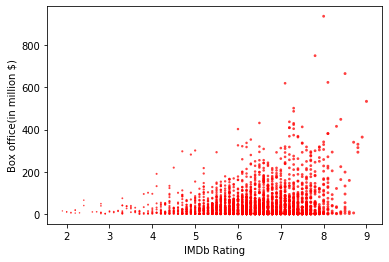

In [11]:
## Circumstance 1, 1 variable regression: IMDB Rating
X = BOdrop["IMDb Rating"].tolist()# X means our input variables (or independent variables)
# Change from object to float to prepare regression

y = target["Box Office"] # Y means our output/dependent variable
y = y.str.replace("$","")
y = y.str.replace(",","")
y = y.astype(float)
y= y/(1e6)
figure4 = plt.scatter(X, y, marker="o", facecolors="red", edgecolors="", s=X,alpha=0.75)
plt.xlabel("IMDb Rating")
plt.ylabel("Box office(in million $)")
plt.show()



In [12]:
# # F1 = plt.scatter(X, y, marker="o", facecolors="red", edgecolors="black", s=X,alpha=0.75)
# x_axis = X
# box = y
# slope, intercept, r_value, p_value, std_err = linregress(x_axis, box)
# # fit = slope * x_axis + intercept


In [13]:
# Add an intercept (beta_0) to our model
X = sm.add_constant(X)

# Print out the statistics
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Box Office   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     116.4
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           1.26e-26
Time:                        09:15:30   Log-Likelihood:                -16074.
No. Observations:                2819   AIC:                         3.215e+04
Df Residuals:                    2817   BIC:                         3.216e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.5053      8.792     -5.176      0.000     -62.744     -28.267
x1            14.6884      1.361     10.790      0.000      12.019      17.358
==============================================================================
Omnibus:                     2082.202   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46446.863
Skew:                           3.294   Prob(JB):                         0.00
Kurtosis:                      21.762   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Scatter plot graph 


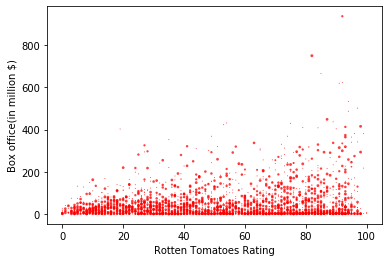

In [25]:
## Circumstance 2, 1 variable regression: Rotten Tomatoes Rating
X1 = BOdrop["Rotten Tomatoes Rating"]# X means our input variables (or independent variables)
# Change from object to float to prepare regression
X1 = X1.replace("%","", regex=True).astype(float)
x=X1.tolist()

y1 = target["Box Office"] # Y means our output/dependent variable
y1 = y1.str.replace("$","")
y1 = y1.str.replace(",","")
y1 = y1.astype(float)
y1= y1/(1e6)

# Add an intercept (beta_0) to our model
X = sm.add_constant(X)

#Print out fig
figure2= plt.scatter(X1, y1, marker="o", facecolors="red", edgecolors="", s=X,alpha=0.75)
plt.xlabel("Rotten Tomatoes Rating")
plt.ylabel("Box office(in million $)")
plt.show()


In [26]:
# Print out the statistics
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Box Office   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     116.4
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           1.26e-26
Time:                        09:19:49   Log-Likelihood:                -16074.
No. Observations:                2819   AIC:                         3.215e+04
Df Residuals:                    2817   BIC:                         3.216e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.5053      8.792     -5.176      0.000     -62.744     -28.267
x1            14.6884      1.361     10.790      0.000      12.019      17.358
==============================================================================
Omnibus:                     2082.202   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46446.863
Skew:                           3.294   Prob(JB):                         0.00
Kurtosis:                      21.762   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

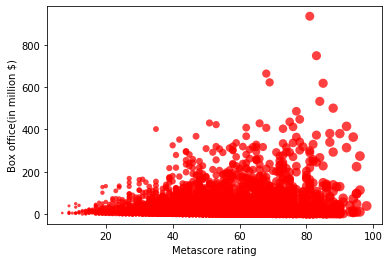

In [31]:
## Circumstance 3, 1 variable regression: Metascore rating
X2 = BOdrop["Metascore"].tolist()# X means our input variables (or independent variables)
# Change from object to float to prepare regression

y2 = target["Box Office"] # Y means our output/dependent variable
y2 = y2.str.replace("$","")
y2 = y2.str.replace(",","")
y2 = y2.astype(float)
y2=y2/(1e6)

figure3= plt.scatter(X2, y2, marker="o", facecolors="red", edgecolors="", s=X2,alpha=0.75)
plt.xlabel("Metascore rating")
plt.ylabel("Box office(in million $)")
plt.show()

In [29]:
# Add an intercept (beta_0) to our model
X2 = sm.add_constant(X2)

# Print out the statistics
model = sm.OLS(y2, X2).fit() 
predictions = model.predict(X2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Box Office   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     80.25
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           5.87e-19
Time:                        09:20:24   Log-Likelihood:                -16092.
No. Observations:                2819   AIC:                         3.219e+04
Df Residuals:                    2817   BIC:                         3.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7701      4.399      2.448      0.014       2.144      19.396
x1             0.7057      0.079      8.958      0.000       0.551       0.860
==============================================================================
Omnibus:                     2096.876   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47141.299
Skew:                           3.326   Prob(JB):                         0.00
Kurtosis:                      21.897   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Circumstance 4, 1 variable regression: "Num Votes" 
N_B=BOdrop.apply(pd.to_numeric, errors='ignore')
x3= N_B["Num Votes"]
X3 = x3.str.replace(",","")# X means our input variables (or independent variables)
# Change from object to float to prepare regression
X3=X3.tolist()

y3 = target["Box Office"] # Y means our output/dependent variable
y3 = y3.str.replace("$","")
y3 = y3.str.replace(",","")
y3 = y3.astype(float)
y3 = y3.tolist()

In [ ]:
# Add an intercept (beta_0) to our model
X3 = sm.add_constant(x3)

# Print out the statistics
model = sm.OLS(y3, X3).fit() 
predictions = model.predict(X3)
model.summary()

In [36]:
## Circumstance 5, 2 variable regression: IMDB Rating, Num Votes
X4 = BOdrop[["IMDb Rating","Num Votes"]]# X means our input variables (or independent variables)
# Change from object to float to prepare regression
X4["Num Votes"]=X4["Num Votes"].replace(",","",regex=True).astype(float)

#Setting an algrithm 
y4 = target["Box Office"] # Y means our output/dependent variable
y4 = y4.str.replace("$","")
y4 = y4.str.replace(",","")
y4 = y4.astype(float)
y4=y4/(1e6)

# Add an intercept (beta_0) to our model
X4 = sm.add_constant(X4)

# Print out the statistics
model = sm.OLS(y4, X4).fit() 
predictions = model.predict(X4)
model.summary()

# According to result,this model has a lower R-squared value,meaning that this model explains
# 61.7% of the variance in our dependent variable. p-value for IMDB rating : We predict at a 95% percent confidence that
#the value of IMDB rating is between 1.57e+06 to 2.36e+06; p-value for Num Votes:We predict at a 95% percent confidence
#that the value of Numbers Votes is between 277.367 to 301.608.

C:\Users\wwwka\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Box Office   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     1285.
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        09:23:22   Log-Likelihood:                -15218.
No. Observations:                2819   AIC:                         3.044e+04
Df Residuals:                    2816   BIC:                         3.046e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          75.9135      6.954     10.916      0.000      62.277      89.550
IMDb Rating   -10.1553      1.128     -9.006      0.000     -12.366      -7.944
Num Votes       0.0003   6.49e-06     48.532      0.000       0.000       0.000
==============================================================================
Omnibus:                     1721.072   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63466.160
Skew:                           2.308   Prob(JB):                         0.00
Kurtosis:                      25.782   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""